# Data exploration

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('usage_train.csv')
data.head()

# plt.plot(data['Anon Student Id'], data['KC(KTracedSkills)'])

,id,datetime,usage
0,MAC003828,2012-12-17 09:00:00,0.073
1,MAC003828,2012-12-17 09:30:00,0.054
2,MAC003828,2012-12-17 10:00:00,0.069
3,MAC003828,2012-12-17 10:30:00,0.070
4,MAC003828,2012-12-17 11:00:00,0.049


This shows the structure of the data and gives an indication of data types. Now, we wish to know whether each customer has a time-series of equal length and when the minimum and maximum times are.

In [17]:
data.groupby('id').size().describe()

count       10.0
mean     17184.0
std          0.0
min      17184.0
25%      17184.0
50%      17184.0
75%      17184.0
max      17184.0
dtype: float64

In [18]:
data['datetime'].min()

'2012-12-17 09:00:00'

In [19]:
data['datetime'].max()

'2013-12-10 08:30:00'

So we have an equal number of time points from each of the ten customer and the data covers 17184 / 48 = 358 days, almost a full year. Next, we want to get an idea of the overall distribution of usage.

In [20]:
data['usage'].describe()

count    171840.000000
mean          0.265695
std           0.324215
min           0.009000
25%           0.092000
50%           0.142000
75%           0.289000
max           3.610000
Name: usage, dtype: float64

In [27]:
data.sort_values('usage', ascending=False).head(n=20)

,id,datetime,usage
56518,MAC000085,2013-03-30 20:00:00,3.610
152280,MAC000246,2013-10-21 21:00:00,3.516
91303,MAC004218,2013-04-08 12:30:00,3.387
142008,MAC000246,2013-03-21 21:00:00,3.369
51952,MAC000085,2012-12-25 17:00:00,3.355
71732,MAC004671,2013-02-17 19:00:00,3.340
91304,MAC004218,2013-04-08 13:00:00,3.326
138264,MAC000246,2013-01-02 21:00:00,3.309
139559,MAC000246,2013-01-29 20:30:00,3.296
138936,MAC000246,2013-01-16 21:00:00,3.262


In [32]:
data.sort_values('usage', ascending=True).head(n=20)

,id,datetime,usage
41462,MAC005415,2013-05-14 04:00:00,0.009
36870,MAC005415,2013-02-07 12:00:00,0.011
42171,MAC005415,2013-05-28 22:30:00,0.011
42227,MAC005415,2013-05-30 02:30:00,0.011
36675,MAC005415,2013-02-03 10:30:00,0.011
36231,MAC005415,2013-01-25 04:30:00,0.012
37392,MAC005415,2013-02-18 09:00:00,0.012
36775,MAC005415,2013-02-05 12:30:00,0.012
36777,MAC005415,2013-02-05 13:30:00,0.012
37303,MAC005415,2013-02-16 12:30:00,0.012


It does not seem like there are any clear outliers (a few values that are an order of magnitude larger than the rest). Now let's have a look at some of the individual time-series. Ten is a little too much, so we have a look at the largest, smallest and typical customer, determined by their median energy usage.

In [33]:
data.groupby('id').median()

,usage
id,
MAC000085,0.355
MAC000094,0.162
MAC000246,0.187
MAC001757,0.126
MAC003685,0.138
MAC003828,0.126
MAC004166,0.085
MAC004218,0.126
MAC004671,0.272


Therefore, we choose to look at customers MAC000085 (largest consumer), MAC005415 (smallest consumer) and MAC003828 (typical consumer). (Btw I don't think it is a coincidence that three consumers have the same median energy usage up to three decimal points.) We plot their time-series and histograms (in the stated order) below 

<Figure size 1440x720 with 0 Axes>

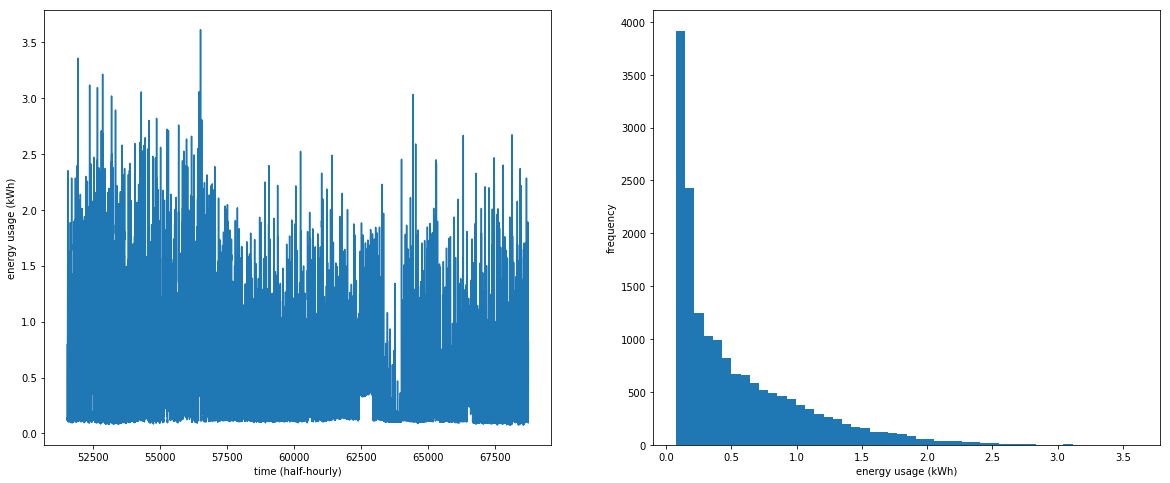

In [66]:
plt.figure(figsize=(20,10))
f, axarr = plt.subplots(1, 2, figsize=(20, 8))
axarr[0].plot(data[data['id'] == 'MAC000085']['usage'])
axarr[0].set_xlabel('time (half-hourly)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[1].hist(data[data['id'] == 'MAC000085']['usage'], bins=50)
axarr[1].set_xlabel('energy usage (kWh)')
axarr[1].set_ylabel('frequency')
plt.show()

<Figure size 1440x720 with 0 Axes>

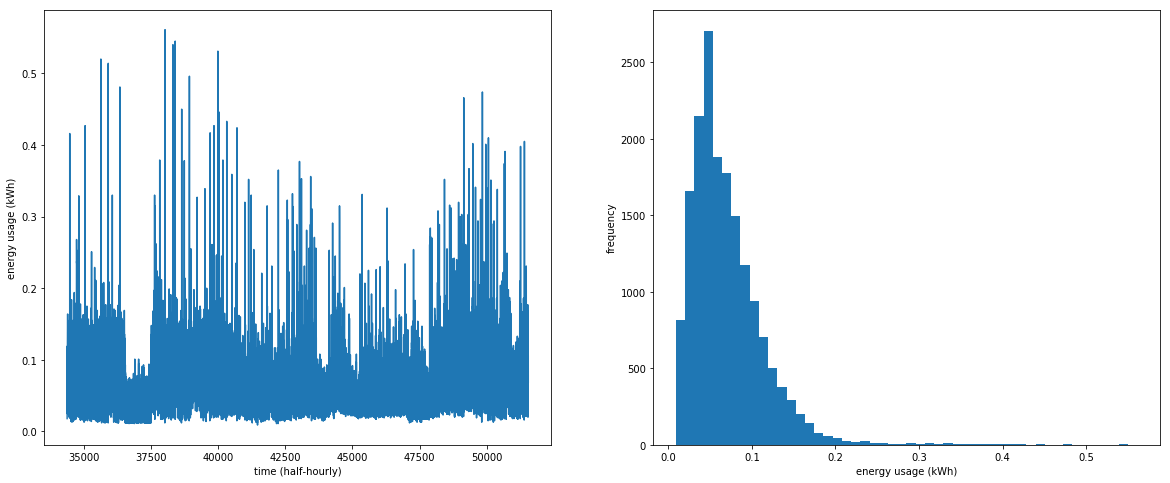

In [67]:
plt.figure(figsize=(20,10))
f, axarr = plt.subplots(1, 2, figsize=(20, 8))
axarr[0].plot(data[data['id'] == 'MAC005415']['usage'])
axarr[0].set_xlabel('time (half-hourly)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[1].hist(data[data['id'] == 'MAC005415']['usage'], bins=50)
axarr[1].set_xlabel('energy usage (kWh)')
axarr[1].set_ylabel('frequency')
plt.show()

<Figure size 1440x720 with 0 Axes>

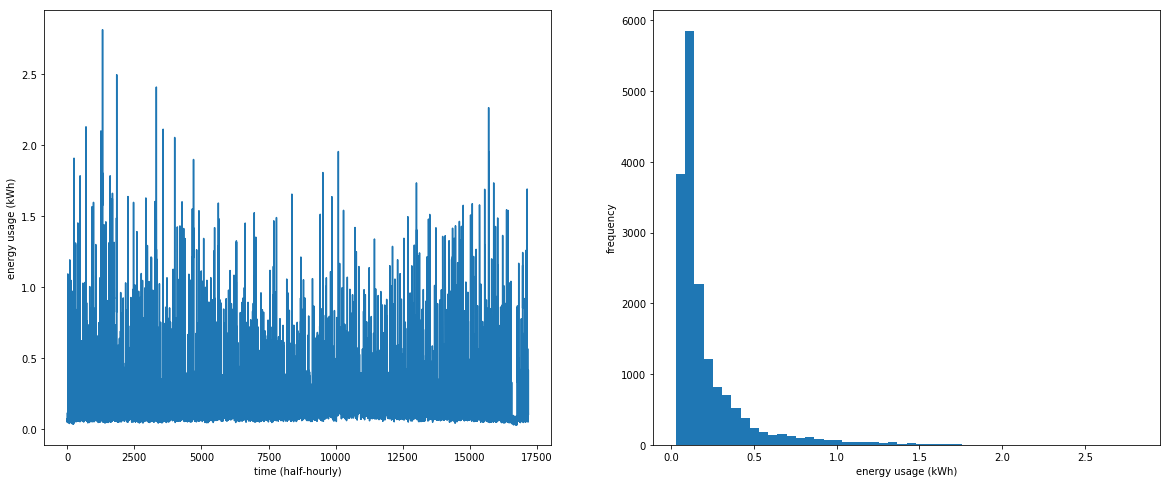

In [69]:
plt.figure(figsize=(20,10))
f, axarr = plt.subplots(1, 2, figsize=(20, 8))
axarr[0].plot(data[data['id'] == 'MAC003828']['usage'])
axarr[0].set_xlabel('time (half-hourly)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[1].hist(data[data['id'] == 'MAC003828']['usage'], bins=50)
axarr[1].set_xlabel('energy usage (kWh)')
axarr[1].set_ylabel('frequency')
plt.show()

From the histograms it appears that an exponential distribution would not be a crazy idea, even though the smallest consumer clearly has a mode that is larger than zero. It would be more proper to model each consumer with a two-parameter positive distribution, such as lognormal, weibull or gamma, but we want to keep it simple for now. The time-series for all customers, and especially the smallest and typical ones, display periodicity, possibly both on a daily and monthly level. We will investigate this next by averaging over days and months respectively.

In order to do this we should transform the data into a tidy dataset, which means that each column is a variable and each row an observation, as this will make it much easier to manipulate it. This means that the columns 'id' and 'datetime' should become multi-indices. Before we do that, however, we wish to create two extra columns for day of the week, day and month of the year, which would then also be converted to muti-indices.

In [95]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['month'] = data['datetime'].map(lambda x: x.month)
data['weekday'] = data['datetime'].dt.dayofweek 
data['yearday'] = data['datetime'].dt.dayofyear
data_tidy = data.set_index(['id', 'datetime', 'month', 'weekday', 'yearday'])
data_tidy.head()

usage
id        datetime            month weekday yearday       
MAC003828 2012-12-17 09:00:00 12    0       352      0.073
          2012-12-17 09:30:00 12    0       352      0.054
          2012-12-17 10:00:00 12    0       352      0.069
          2012-12-17 10:30:00 12    0       352      0.070
          2012-12-17 11:00:00 12    0       352      0.049

We start with the monthly data and plot time-series for all three customers.

<Figure size 432x288 with 0 Axes>

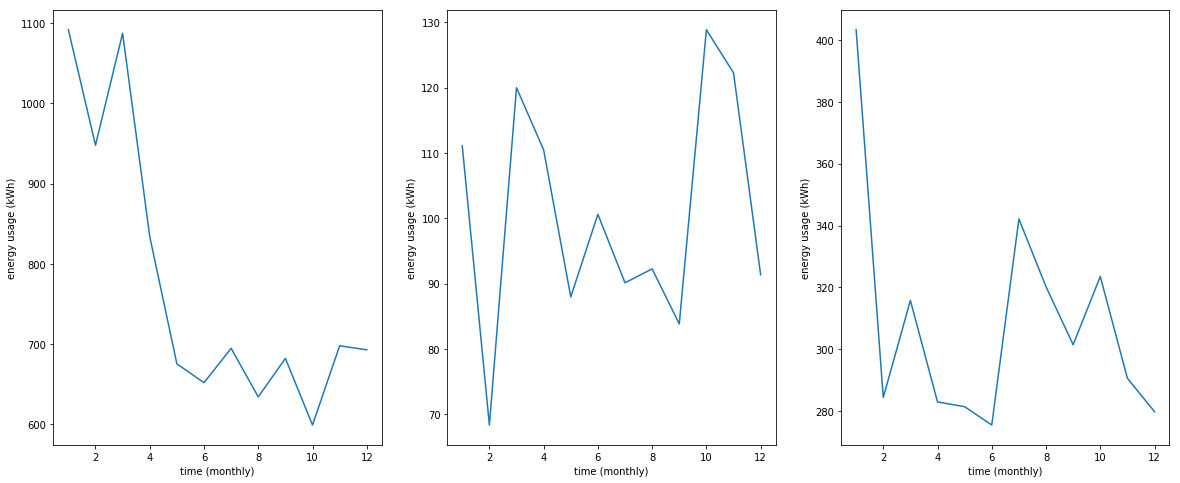

In [125]:
monthly_data = data_tidy.groupby(level=['id', 'month']).sum()

plt.figure()
f, axarr = plt.subplots(1, 3, figsize=(20, 8))
axarr[0].plot(monthly_data.loc['MAC000085'])
axarr[0].set_xlabel('time (monthly)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[1].plot(monthly_data.loc['MAC005415'])
axarr[1].set_xlabel('time (monthly)')
axarr[1].set_ylabel('energy usage (kWh)')
axarr[2].plot(monthly_data.loc['MAC003828'])
axarr[2].set_xlabel('time (monthly)')
axarr[2].set_ylabel('energy usage (kWh)')
plt.show()

Note that the December month is not complete, hence this should be ignored. Otherwise, it is clear that there are significant differences between the months for each customer. Interestingly, the differences are not the same for each customer, although all customers use more electricity during the colder half of the year. Therefore, it would make sense to incorporate monthly dummy variables.

Next we will have a look at the effect of the day of the week. However, because the monthly effects are superimposed, it is of no use to simply groupby day of the week, hence we should look at daily time-series for a few weeks. 

<Figure size 432x288 with 0 Axes>

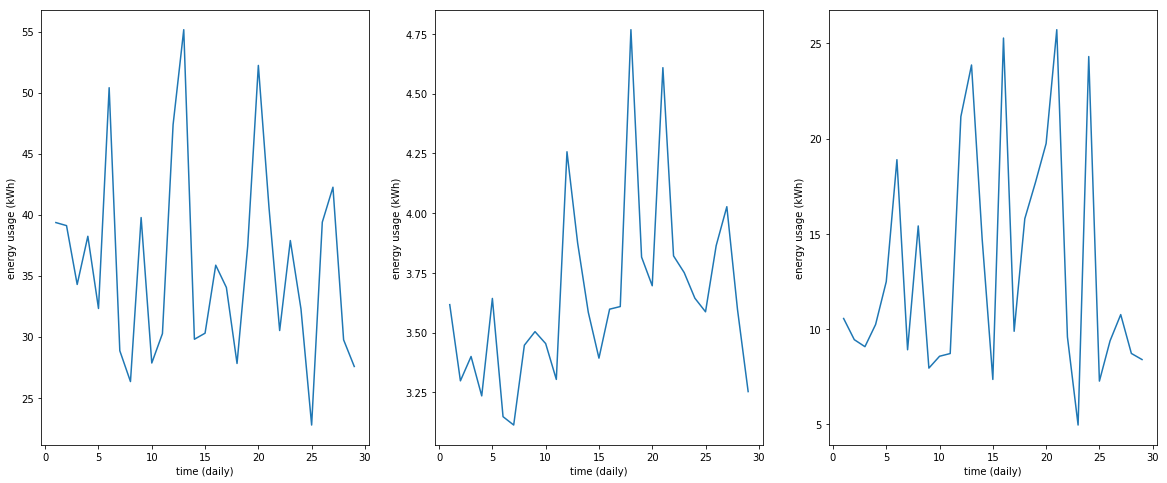

In [135]:
daily_data = data_tidy.groupby(level=['id', 'yearday']).sum()
first_day = 1
last_day = 29

plt.figure()
f, axarr = plt.subplots(1, 3, figsize=(20, 8))
axarr[0].plot(daily_data.loc['MAC000085'].loc[first_day:last_day] )
axarr[0].set_xlabel('time (daily)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[1].plot(daily_data.loc['MAC005415'].loc[first_day:last_day] )
axarr[1].set_xlabel('time (daily)')
axarr[1].set_ylabel('energy usage (kWh)')
axarr[2].plot(daily_data.loc['MAC003828'].loc[first_day:last_day] )
axarr[2].set_xlabel('time (daily)')
axarr[2].set_ylabel('energy usage (kWh)')
plt.show()

# daily_data.loc[('MAC000085', 1): ('MAC000085', 90)].drop(level=0) 
# daily_data.loc['MAC000085'].loc[1:90]

There seems to be periodicity on a 7-day basis (weekly), the exact nature of which is again different for each customer. Therefore, it would make sense to incorporate daily dummy variables.

Finally, we want to have a look at the time-series at the half-hourly level for a short period of time, since looking at all 17184 time points at the same time does not give any clue about the kind of intra-day variability.

<Figure size 432x288 with 0 Axes>

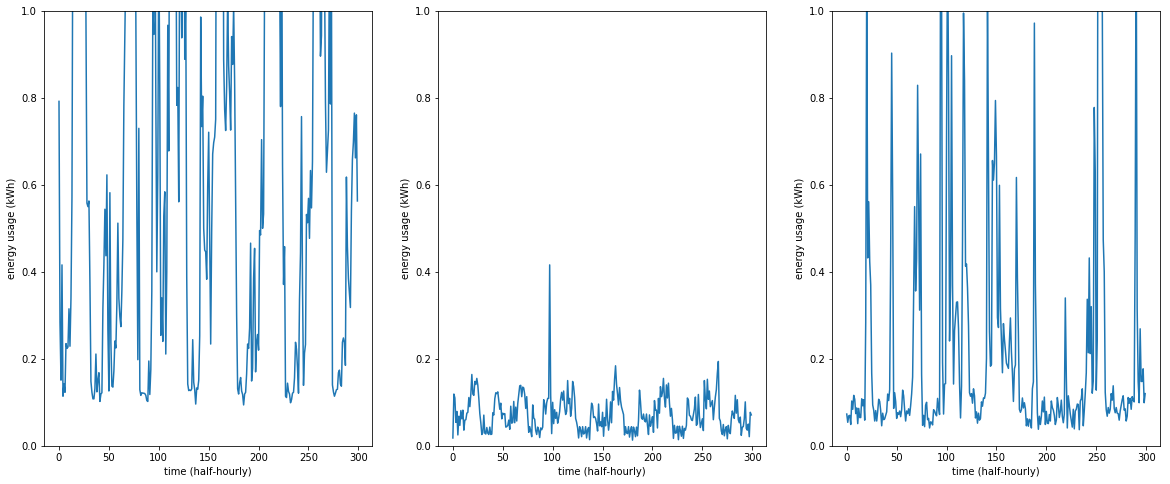

In [145]:
first_time_point = 0
last_time_point = 300
short_data = data_tidy.loc['MAC003828'].reset_index(drop=True).iloc[first_time_point:last_time_point]

y_lower = 0
y_upper = 1

plt.figure()
f, axarr = plt.subplots(1, 3, figsize=(20, 8))
axarr[0].plot(data_tidy.loc['MAC000085'].reset_index(drop=True).iloc[first_time_point:last_time_point] )
axarr[0].set_xlabel('time (half-hourly)')
axarr[0].set_ylabel('energy usage (kWh)')
axarr[0].set_ylim(y_lower, y_upper)
axarr[1].plot(data_tidy.loc['MAC005415'].reset_index(drop=True).iloc[first_time_point:last_time_point] )
axarr[1].set_xlabel('time (half-hourly)')
axarr[1].set_ylabel('energy usage (kWh)')
axarr[1].set_ylim(y_lower, y_upper)
axarr[2].plot(data_tidy.loc['MAC003828'].reset_index(drop=True).iloc[first_time_point:last_time_point] )
axarr[2].set_xlabel('time (half-hourly)')
axarr[2].set_ylabel('energy usage (kWh)')
axarr[2].set_ylim(y_lower, y_upper)

plt.show()


It is clear that there is significant intra-day variation, presumably corresponding to daily routines (sleeping, being awake inside of the house, being outside of the house). As before, the exact patterns are different for different customers. Because the vertical axes have the same scale for each customer here, it is also apparent how big the difference in median energy usage is between customers.   

However, it seems that (at least) two regimes can be roughly distinguished for each customer and it may be useful to model these states. It does not seem possible to clearly separate two regimes using one global threshold for each customer, so a threshold would have to be calculated for each customer. One way of doing this is by dividing the median energy usage by the 25 percentile energy usage for each customer and to see whether this is a stable quantity.

In [178]:
data_tidy.head()
quantiles_25 = data_tidy.groupby(level=0).quantile(0.25).values
medians = data_tidy.groupby(level=0).median().values
print(medians / quantiles_25)

[[2.32026141]
 [1.30645164]
 [2.46052648]
 [1.44827593]
 [1.42268033]
 [1.41573034]
 [1.49122809]
 [1.11504429]
 [1.24200922]
 [1.48780485]]


It seems that these multiples are relatively stable, so we will work with the 25th quantile as threshold value for each customer.

In future, to systematically establish the variation between customers, for half-hourly, daily and monthly data, plot time-series of (a) median usage per time-point over all customers and (b) median absolute deviation per time-point over all customers.